
## Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
!pip install imblearn
!pip install lightgbm
!pip install xgboost

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

from the above data frame we can see there are total 1338 rows and 7 coulmns

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Lets do the exploratary data analysis in this process lets perform the non graphical analsys

# EDA

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we can observe that there are float ,int, objective type data in the given data set

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

WE CAN SEE THERE ARE NO NULL VALUES

In [10]:
df.isnull().sum().sum()

0

The total sum ogf null values is 0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From  THE above information we can clearly say there are no null values in any rows and we have 3 datatypes in which 3 are float 2 are int and the remaining are objective which we convert to int

In [12]:
#Checking the value counts of each Column
for i in df.columns:
    print(df[i].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#encoding the sex columns
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

df.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [19]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Given that the describe() method returns a description of the data in the specified DataFrame, we use it to determine the description of numerical data, which provides the following information in each column. Analyses of skewness or outliers will not be present in categorical data or the target variable.

1) COUNT: There are no data gaps in the counts of all columns.


2) MEAN: Because the mean value is nearly identical across all age, BMI, and child columns, we conclude that there is no skewness and that the number of outliers will be minimal.
3) The data in the charges column contain a mean that is lower than the median, but since this is a target variable, we won't treat it.

4) By observing and summarising the data, we can see that age, bmi, and children have less outliers than other columns since there is a little difference between 75% and Max Value. As a result, we need to use the ZSCORE Method to remove the outliers from these columns.


5) Additional findings include the fact that the describe approach calculates the standard deviation as adjusted sample standard deviation and 25% percentile.


# checking for uniuqe values in target label
df['charges'].unique()

In [20]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [21]:
df['charges'].nunique()

1337

we can note that there are 1337 unique values in targeted label

In [22]:
for val in df.columns:
    print(df[val].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


0    676
1    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


1    1064
0     274
Name: smoker, dtype: int64


0    364
1    325
3    325
2    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.3

# graphical analysis

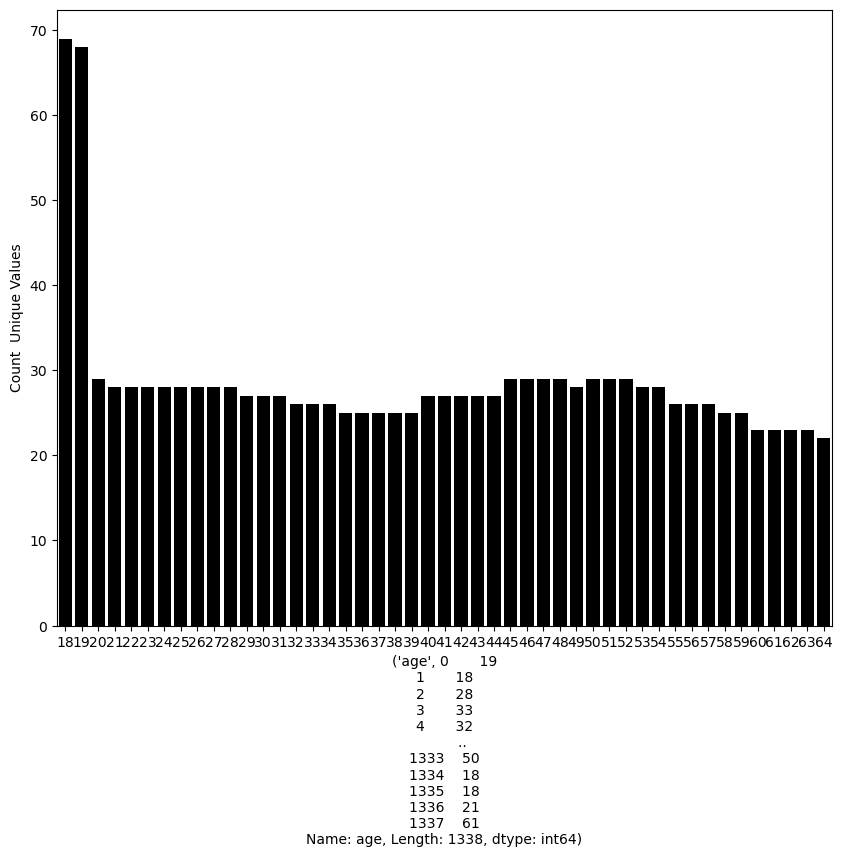

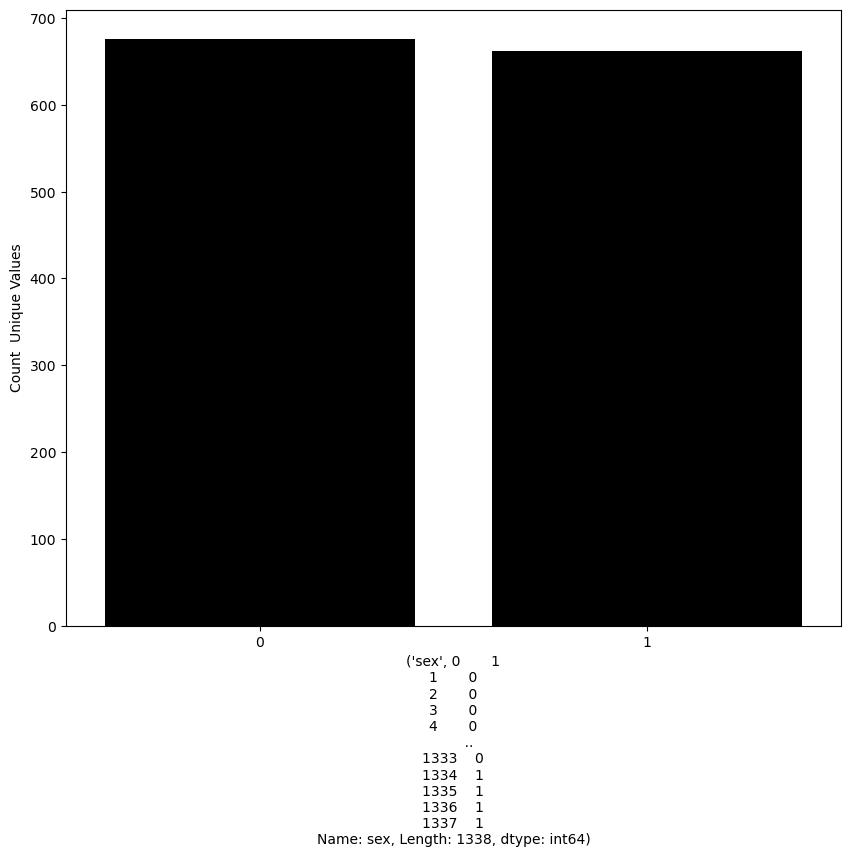

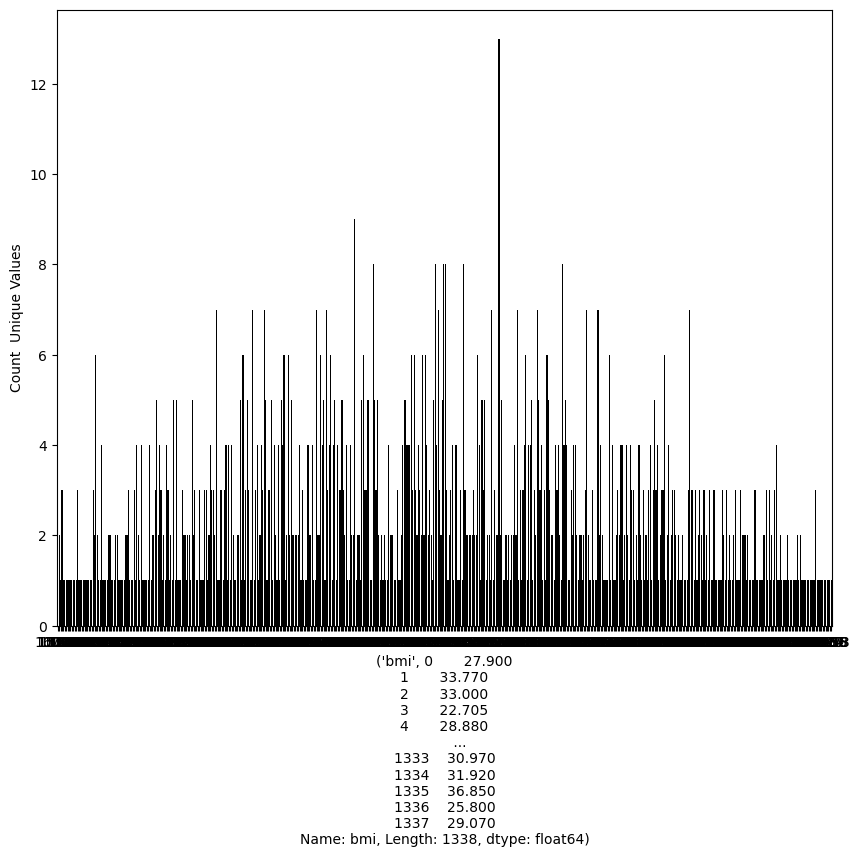

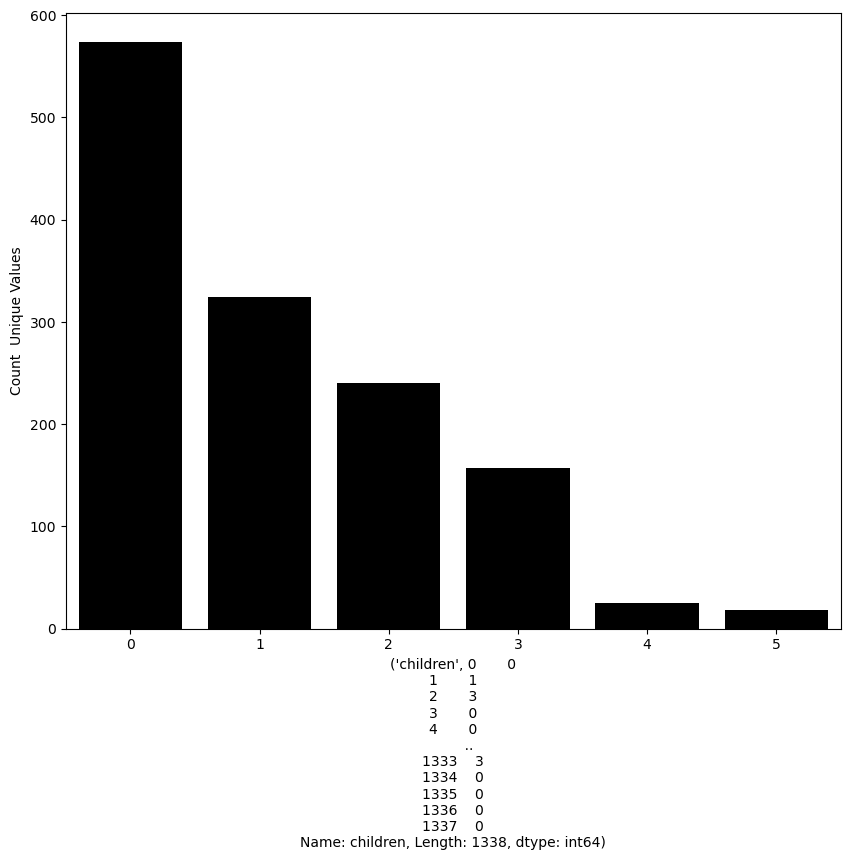

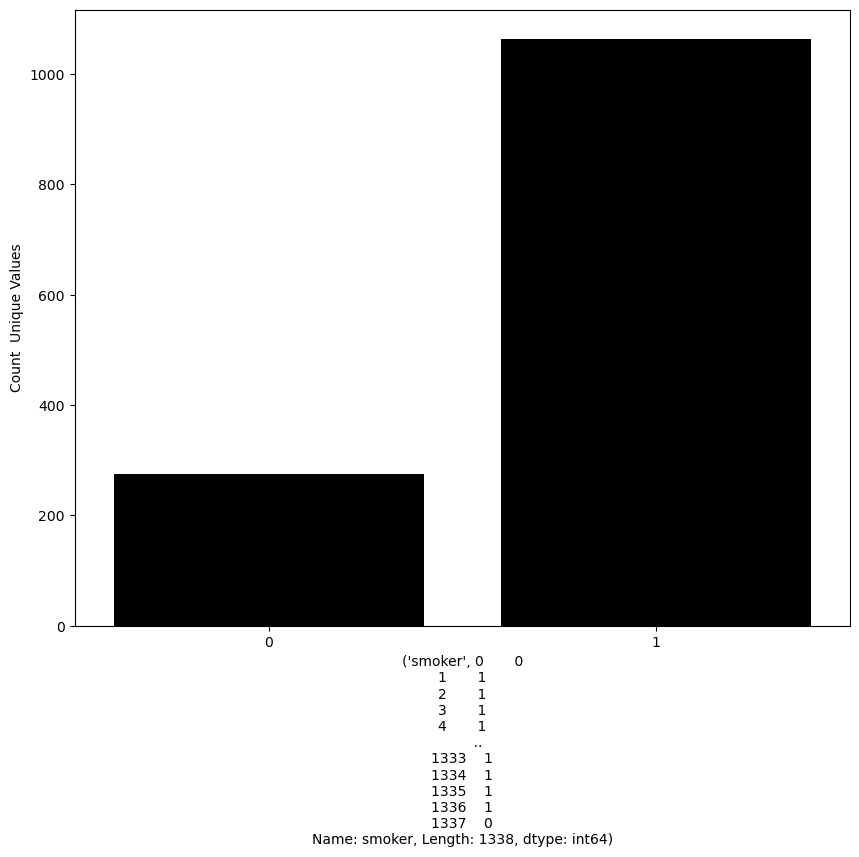

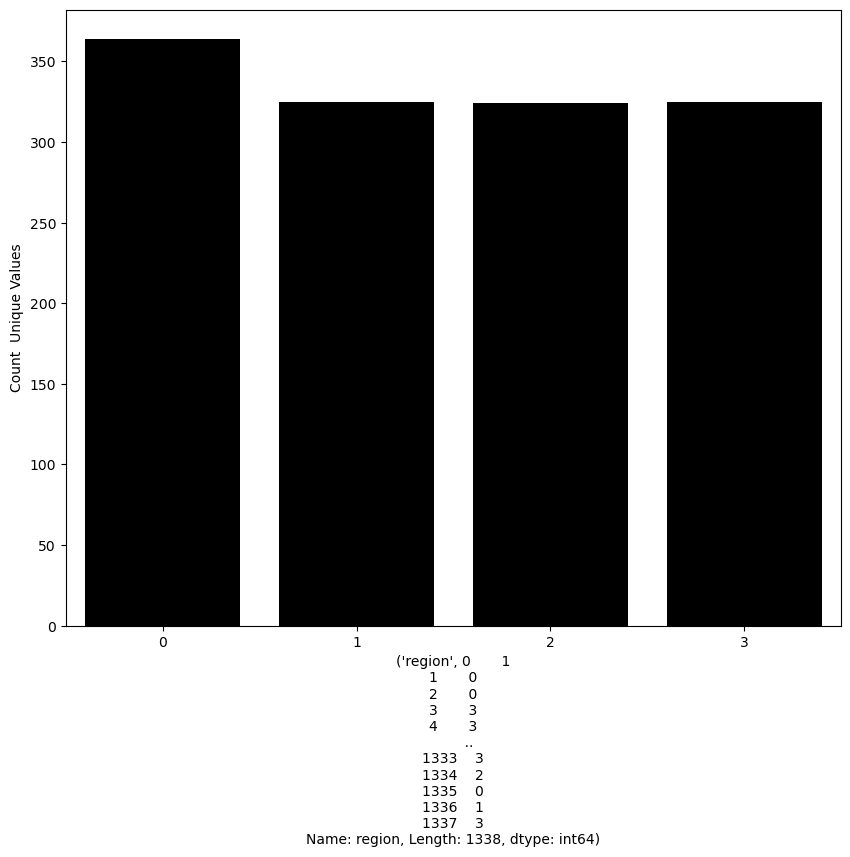

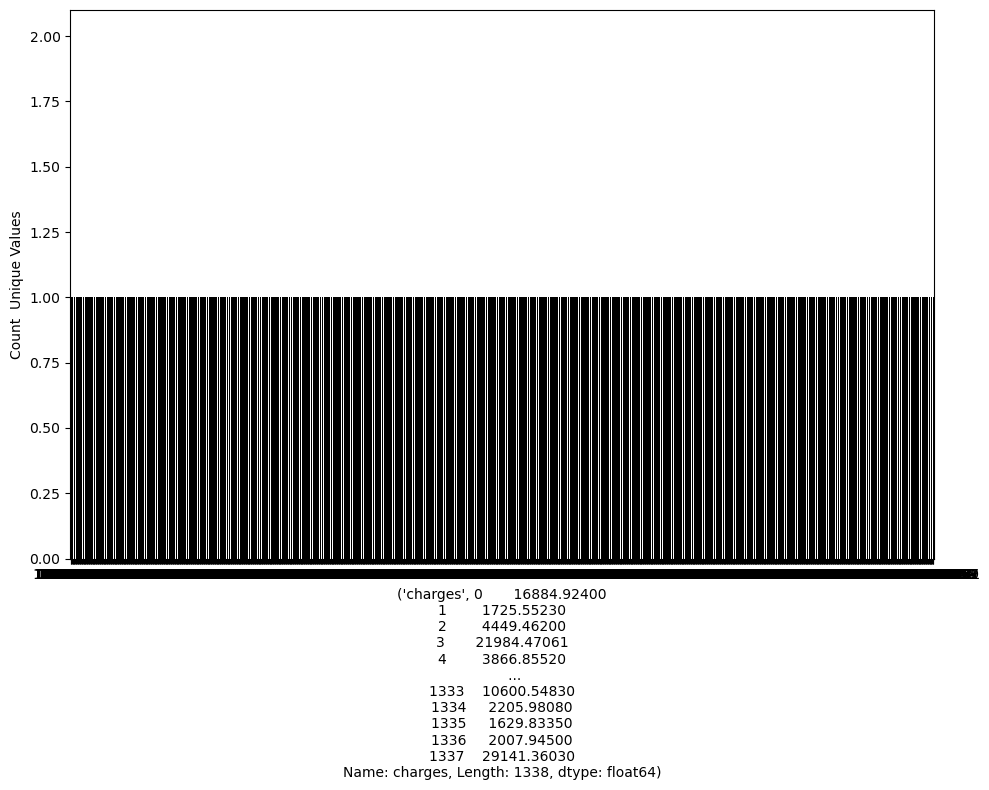

In [23]:
# Countplot for each column in the DataFrame
index=0
for col in df.items():
    plt.figure(figsize=(10,8))
    sns.countplot(x=col[index], data=df, color="black")
    plt.xlabel(col)
    plt.ylabel('Count  Unique Values')
plt.tight_layout()
plt.show()

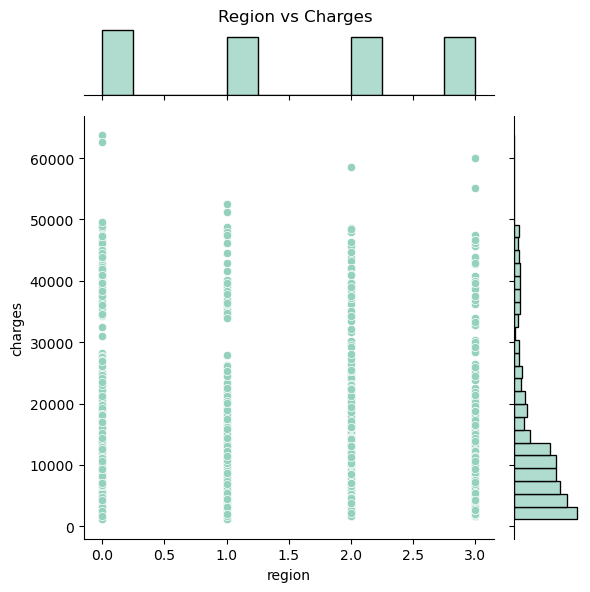

In [24]:
sns.set_palette("GnBu_d")
sns.set_style()
p=sns.jointplot(x='region',y='charges',data=df)
p.fig.suptitle('Region vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

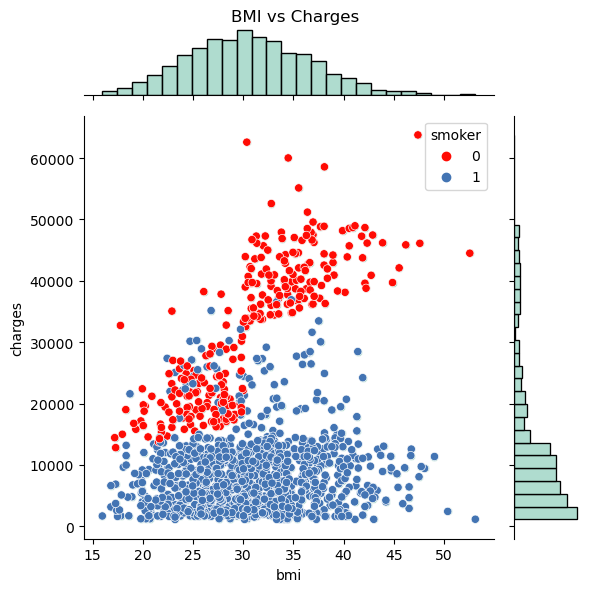

In [25]:
p=sns.jointplot(x='bmi',y='charges',data=df)
p.fig.suptitle('BMI vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

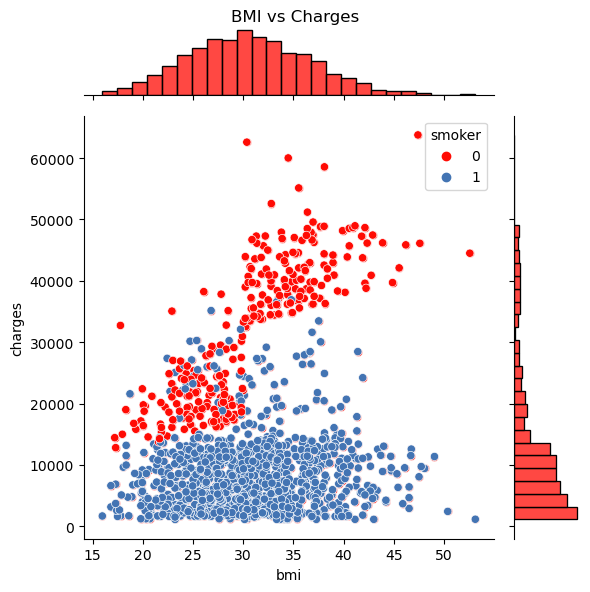

In [26]:
p=sns.jointplot(x='bmi',y='charges',data=df)
p.fig.suptitle('BMI vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

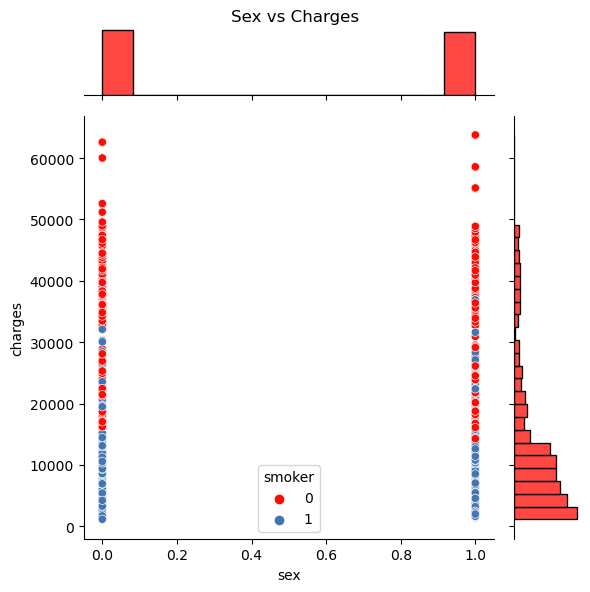

In [27]:
p=sns.jointplot(x='sex',y='charges',data=df)
p.fig.suptitle('Sex vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

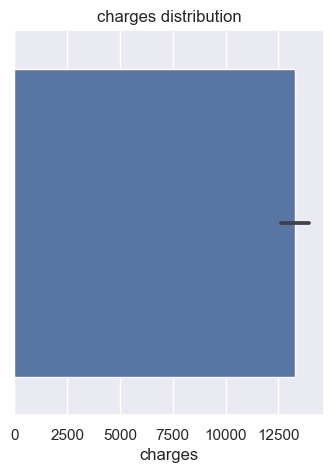

In [29]:
#distribution  of charges
sns.set()
plt.figure(figsize=(4,5))
sns.barplot(df['charges'])
plt.title('charges distribution')
plt.show()

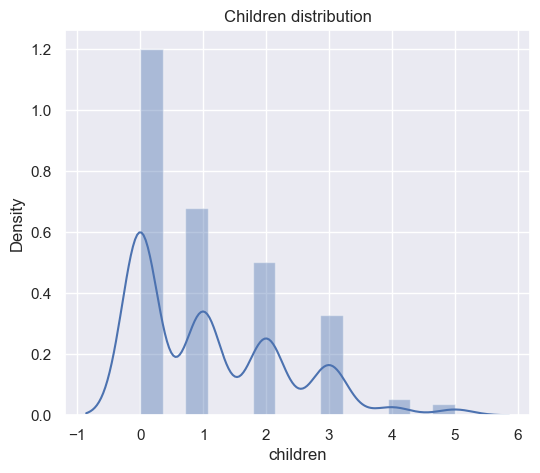

In [31]:
sns.set()
plt.figure(figsize=(6,5))
sns.distplot(df['children'])
plt.title('Children distribution')
plt.show()

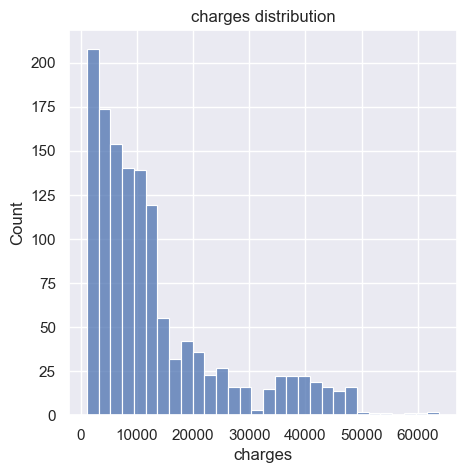

In [34]:
#distribution  of charges
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(df['charges'])
plt.title('charges distribution')
plt.show()

Since Charges is the target column, skewness and outliers are not taken into account. Other columns have relatively few outliers and zero skewness. hence there is no need for any EDA changes.

In [35]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

in the above we have split the target labe and features seaperately in to x and y columns

In [36]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


splitting data for train test

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


# training the model

as to caliculate the values and the data frame is in binary values we choose linear regression for training

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
value=LinearRegression()
value

LinearRegression()

In [43]:
value.fit(x_train,y_train)

LinearRegression()

In [44]:
train_pred=value.predict(x_train)

## model training and evaluation

In [45]:
r2_train= metrics.r2_score(y_train,train_pred)
print('R  Squared value :',r2_train)

R  Squared value : 0.751505643411174


The r value lies between the range of 0 and 1

In [46]:
test_pred=value.predict(x_test)
r2_test=metrics.r2_score(y_test,test_pred)
print('R  Squared value :',r2_test)

R  Squared value : 0.7447273869684077


Predective system

In [51]:
input_data=(31,1,25.74,0,1,0)
num_array=np.asarray(input_data)
reshaped_num_array=num_array.reshape(1,-1)
prediction=value.predict(reshaped_num_array)
print(prediction)
print('The insurance cost in USD ',prediction[0])

[3760.0805765]
The insurance cost in USD  3760.0805764960496


changing the input data into the numpy array we get the above condition

In [55]:
nput_data=(29,0,28.74,1,1,1)
num_array=np.asarray(input_data)
reshaped_num_array=num_array.reshape(1,-1)
prediction=value.predict(reshaped_num_array)
print(prediction)
print('The insurance cost in USD ',prediction[0])

[3760.0805765]
The insurance cost in USD  3760.0805764960496


from above predictions we can notice the cost changes with the smoking habbits and age and the cost will be varied